## Predicting The Price of Houses in Bengaluru


**Problem statement: By analyzing these Bangalore house data we will determine the approximate price for the houses**

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [60]:
df = pd.read_csv(r"Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


**Data exploring and data cleaning**

In [62]:
 df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

The area type column just denote the type of area mentioned in total_sqft column and is not a valuable feature to predict price.

In [63]:
df1=df.drop(labels='area_type',axis=1,inplace=False)
df1.head()

,availability,location,size,society,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [64]:
df1.groupby('availability')['availability'].agg('count').sort_values(ascending=False)

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
17-Jan               1
16-Jul               1
16-Nov               1
16-Oct               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [65]:
# the available column has more than 10,000 observations with ready to move status and others with specified date
# these dates can be replaced with not ready 
df1['availability']=df1['availability'].apply(lambda x: 'Not Ready' if x.strip()!='Ready To Move' else x)
df1['availability'].value_counts()

Ready To Move    10581
Not Ready         2739
Name: availability, dtype: int64

In [66]:
df1.groupby('society')['society'].agg('count')

society
3Codeli    2
7 ise P    1
A idse     2
A rtsai    1
ACersd     1
          ..
Zonce E    2
Zostaa     3
i1ncyRe    1
i1odsne    1
i1rtsCo    3
Name: society, Length: 2688, dtype: int64

In [67]:
df['society'].isnull().sum()

5502

In [68]:
#can be dropped as it has very high variablity and several null values
df1=df1.drop(labels='society',axis=1)
df1.head()

,availability,location,size,total_sqft,bath,balcony,price
0,Not Ready,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [69]:
df1.groupby('size')['size'].agg('count')

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [70]:
df1['size'].isnull().sum()

16

In [71]:
#replacing null values in size column with 0 as room size if not avaliable
df1['size']=df1['size'].fillna('0')

The size column has 2 notations bhk- (bedroom hall and kitchen) and bedroom both can be referred as bhk

In [72]:
df2=df1.copy()
df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))
df2.head()

,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Not Ready,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [73]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [74]:
#check if all the values can be converted to float 
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True
    
df2[~df2['total_sqft'].apply(lambda x:isfloat(x))].head(10)

,availability,location,size,total_sqft,bath,balcony,price,bhk
30,Not Ready,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Not Ready,Devanahalli,4 Bedroom,3010 - 3410,NaN,NaN,192.000,4
81,Not Ready,Hennur Road,4 Bedroom,2957 - 3450,NaN,NaN,224.500,4
122,Not Ready,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Not Ready,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Not Ready,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
224,Not Ready,Devanahalli,3 BHK,1520 - 1740,NaN,NaN,74.820,3
410,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Not Ready,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2


In [75]:
#checking no of observations with other units included in the dataset
import re
def getxyz(x):
    ck=re.compile("([0-9]+)([a-zA-Z]+)")
    if(ck.match(x)):
        k=ck.match(x).groups()
    else:
        return 0
    return k[1]


x=df2['total_sqft'].apply(lambda x:getxyz(x))
x[x!=0].count()

30

The total_sqft column represents the total area of house in square feet it has to convert to float and range values has to be replaced with the mean.It also includes few other unit values in Sq.meter,perch etc are only 30 observations so they can be droppped.

In [76]:
def correct_sqft(x):
    a=x.split('-')
    if len(a)==2:
        return (float(a[0])+float(a[1]))/2
    try:
        return float(x)
    except:
        return None 

In [77]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(correct_sqft)
print(df3.shape)
df3.head()

(13320, 8)


,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Not Ready,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [78]:
df3[29:33]

,availability,location,size,total_sqft,bath,balcony,price,bhk
29,Ready To Move,Electronic City,3 BHK,1025.0,2.0,1.0,47.0,3
30,Not Ready,Yelahanka,4 BHK,2475.0,4.0,0.0,186.0,4
31,Ready To Move,Bisuvanahalli,3 BHK,1075.0,2.0,1.0,35.0,3
32,Ready To Move,Hebbal,3 BHK,1760.0,2.0,2.0,123.0,3


In [79]:
#Since Location is object type data with string there is high chance of duplication
#if spaces are not considered so representing all location values in 
# with no spaces at front and end will avoid such cases
df3['location']=df3['location'].apply(lambda x: str(x).strip())
loc_count=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_count

location
Whitefield           541
Sarjapur  Road       399
Electronic City      304
Kanakpura Road       273
Thanisandra          237
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1295, dtype: int64

In [80]:
below_10_loc=loc_count[loc_count<=10]
below_10_loc.count()

1054

So it can be viewed that there are several observations with the location value appearing in very few in such cases a it is difficult to find a proper relation between price and location. So all such 1043 locations appearing not more than 10 times can be labelled as others.

In [81]:
df4=df3.copy()
df4['location']=df4['location'].apply(lambda x: x if x not in below_10_loc else 'Other')

In [82]:
df4['location'].nunique()
#new unique locations count after applying a transformation

242

**Handling missing values**

In [83]:
df4.isnull().sum()

availability      0
location          0
size              0
total_sqft       46
bath             73
balcony         609
price             0
bhk               0
dtype: int64

In case of bath and baloncy the missing values are not very high they can be imputed. Since total_sqft being the major feature involved for price prediction the rows with a missing value in total_sqft must be dropped.

In [84]:
df5=df4.copy()
balcony_med=float(round(df5['balcony'].median()))
df5['balcony'].fillna(balcony_med,inplace=True)
bath_med=float(round(df5['bath'].median()))
df5['bath'].fillna(bath_med,inplace=True)

In [85]:
df5.isnull().sum()

availability     0
location         0
size             0
total_sqft      46
bath             0
balcony          0
price            0
bhk              0
dtype: int64

In [86]:
df6=df5.copy()
df6=df6.dropna(subset=['total_sqft'],axis=0)
#dropping rows with missing values in total_sqft feature
df6.isnull().sum()

availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64

**Feature Engineering**

The value of price column are in terms of lakhs. The actual Property cost in Real estate is measured using price per square foot so the it can be used to observe if it provides any information.

In [87]:
df7=df6.copy()
df7['price_persqft']=(df7['price']*100000)/df7['total_sqft']
df7.head()

,availability,location,size,total_sqft,bath,balcony,price,bhk,price_persqft
0,Not Ready,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [88]:
# Considering that 300sqft is the threshold for general bedroom area
x=df7[df7['total_sqft']/df7['bhk']<300]
x.head()
print(x.shape)

(744, 9)


In [89]:
df7 = df7[df7['total_sqft']/df7['bhk']>=300]
df7.head()

,availability,location,size,total_sqft,bath,balcony,price,bhk,price_persqft
0,Not Ready,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [90]:
df7.shape

(12530, 9)

**Outlier removal**

In [91]:
df7.describe()

,total_sqft,bath,balcony,price,bhk,price_persqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,1.604629,111.382401,2.648284,6303.979357
std,1261.271296,1.077938,0.796238,152.077329,0.980982,4162.237981
min,300.000000,1.000000,0.000000,8.440000,0.000000,267.829813
25%,1116.000000,2.000000,1.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,2.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3.000000,3600.000000,16.000000,176470.588235


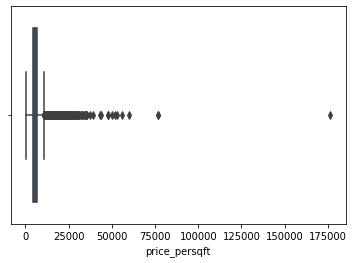

In [92]:
sns.boxplot(data=df7,x='price_persqft')
plt.show()

In [93]:
2#for the pricepersqft grouped by location and filtering data 
#within mean-1*std to mean+1*std range when grouped based on each location 
def handle_outliers_pps(df):
    df_out = pd.DataFrame()
    
    for key, sub_df in df.groupby('location'):
        m = np.mean(sub_df['price_persqft'])
        sd = np.std(sub_df['price_persqft'])
        reduce_df = sub_df[(sub_df['price_persqft']>(m-sd)) & (sub_df['price_persqft']<(m+sd))]
        df_out = pd.concat([df_out, reduce_df], ignore_index=True)
    
    return df_out


In [94]:
df8=handle_outliers_pps(df7)
df8.head()

,availability,location,size,total_sqft,bath,balcony,price,bhk,price_persqft
0,Not Ready,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,Not Ready,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,Ready To Move,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,Not Ready,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,Not Ready,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


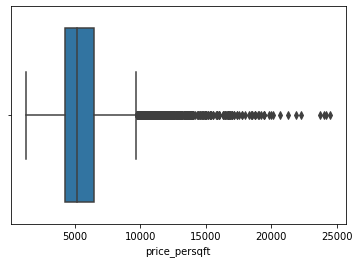

In [95]:
sns.boxplot(data=df8,x='price_persqft')
plt.show()

In [96]:
df8.shape

(10301, 9)

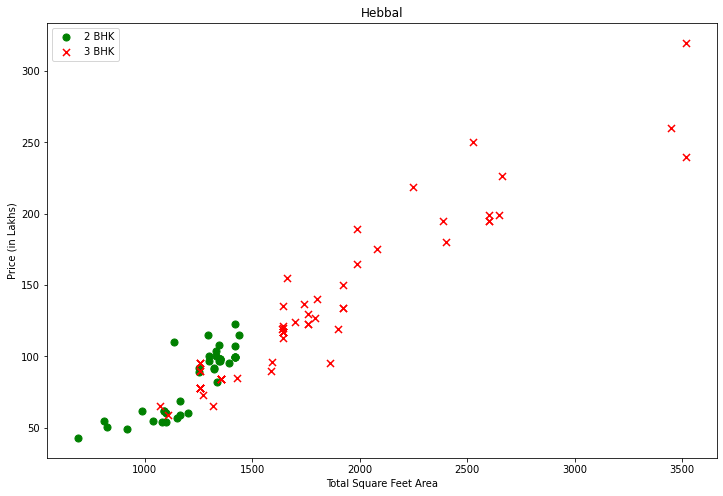

In [97]:
def plot_scatter_chart(df, location):
    df1=df[df['location'] == location]
    bhk2 = df1[df1['bhk'] == 2]
    bhk3 = df1[df1['bhk'] == 3]
    plt.figure(figsize=(12,8))
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color='green', label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], color='red', marker='x', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price (in Lakhs)')
    plt.title(location)
    plt.legend()
    plt.show()
    
plot_scatter_chart(df8, 'Hebbal')

Now it can be observed there are cases when data is grouped by area and the price of houses with 
3bhk and 2bhk in of almost same area are compared, it shows that in few cases the price of 2bhk 
are more than 3bhk it can be removed by using mean of less bhk as threshold to elimante such values.

In [98]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_persqft),
                'std': np.std(bhk_df.price_persqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_persqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_indices, axis='index')


In [99]:
df9 = remove_bhk_outliers(df8)
print(len(df9), len(df8))

7363 10301


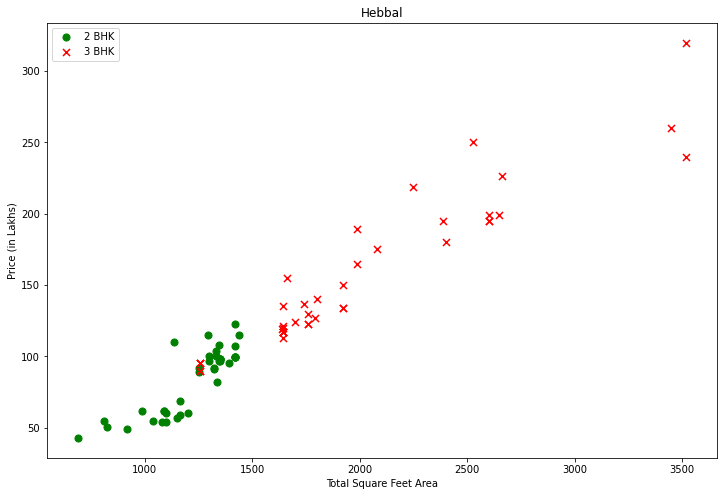

In [100]:
plot_scatter_chart(df9, 'Hebbal')

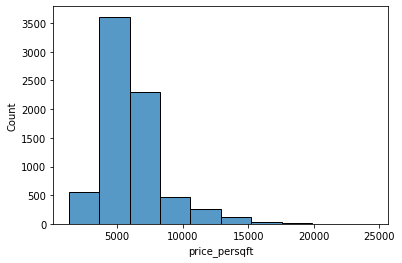

In [101]:
sns.histplot(x=df9['price_persqft'],bins=10)
plt.show()

[ 4.  3.  2.  5.  8.  1.  6.  7.  9. 12. 16. 13.]


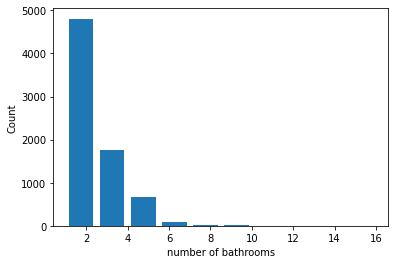

In [102]:
print(df9.bath.unique())
plt.hist(df9.bath , rwidth = 0.8)
plt.xlabel('number of bathrooms')
plt.ylabel('Count')
plt.show()

In [103]:
#removing bath column outliers based on condition
#the bathrooms for any house can't be greater than bhk rooms+2
df10 = df9[(df9['bath']<df9['bhk']+2)]
df10.shape

(7279, 9)

In [104]:
df10.head()

,availability,location,size,total_sqft,bath,balcony,price,bhk,price_persqft
0,Not Ready,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,Not Ready,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,Ready To Move,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,Not Ready,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,Not Ready,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [105]:

df10['location'].nunique()

242

In [106]:
df11=df10.drop(labels=['size','price_persqft','balcony'],axis=1)
df11.head()

,availability,location,total_sqft,bath,price,bhk
0,Not Ready,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Not Ready,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Ready To Move,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Not Ready,1st Block Jayanagar,1200.0,2.0,130.0,3
4,Not Ready,1st Block Jayanagar,1235.0,2.0,148.0,2


The Location value has total 145 unique values so to use it as input for price prediction it can encoded using onehot encoding that results in 145 new columns

In [107]:
pd.get_dummies(df11['location']).head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [108]:
loc_encoding=pd.get_dummies(df10['location'])
avail_encoding=pd.get_dummies(df10['availability'])
new_df=pd.concat([avail_encoding,loc_encoding],axis=1)
new_df=pd.concat([df11,new_df,],axis=1)
new_df.head()

,availability,location,total_sqft,bath,price,bhk,Not Ready,Ready To Move,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Not Ready,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Not Ready,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ready To Move,1st Block Jayanagar,1875.0,2.0,235.0,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Not Ready,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Not Ready,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
new_df.shape

(7279, 250)

In [110]:
new_df.drop(labels=['location','availability','Yeshwanthpur','Not Ready'],axis=1,inplace=True)
new_df.head()

,total_sqft,bath,price,bhk,Ready To Move,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,...,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli
0,2850.0,4.0,428.0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
X=new_df.drop(labels='price',axis=1)
Y=new_df['price']
print(X.shape,Y.shape)

(7279, 245) (7279,)


In [112]:
#Checking for a cross validation score to estimate our model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
cv_dt=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(normalize=True),X,Y,cv=cv_dt)

array([0.7962414 , 0.85812492, 0.84986855, 0.8247006 , 0.87004443])

**Hyperparamter Tuning Using GridSearchCV**

In [129]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor

In [133]:
# Creating a function for GridSearchCV

def find_best_model(X,y):
    models = {
        'Linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'normalize': [True,False]
            }
        },
        
        'Lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'Decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv_X_y = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'],cv=cv_X_y, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'accuracy': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'accuracy'])


In [134]:

find_best_model(X, Y)

,model,best_parameters,accuracy
0,Linear_regression,{'normalize': False},0.839796
1,Lasso,"{'alpha': 1, 'selection': 'random'}",0.706641
2,Decision_tree,"{'criterion': 'mse', 'splitter': 'random'}",0.803084


In [135]:

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)
model1 = LinearRegression()
model1.fit(X_train, Y_train)

model1.score(X_test,Y_test)

0.887899227186432

In [136]:
# Creating a function to predict values for a given set of input values
def prediction(location,availability, sqft, bath,bhk ):
    
    avail_index=-1
    loc_index = int(np.where(X.columns==location)[0][0])
    if availability!='Not Ready':
        avail_index = np.where(X.columns==availability)[0][0]
            
    x = np.zeros(len(X.columns))
    
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index >= 0:
        x[loc_index] = 1
    
    if avail_index >= 0:
        x[avail_index] = 1
    
    return model1.predict([x])[0]

In [137]:
X.columns

Index(['total_sqft', 'bath', 'bhk', 'Ready To Move', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield', 'Yelachenahalli',
       'Yelahanka', 'Yelahanka New Town', 'Yelenahalli'],
      dtype='object', length=245)

In [138]:
# Prediction 1
# Input in the form : Location, availability,  Sqft, Bath, bhk
prediction('1st Phase JP Nagar', 'Not Ready',  1000,2,2 )

86.08968124123113

In [139]:
prediction('1st Phase JP Nagar', 'Ready To Move',  1000,3,3 )

81.88302801759943

In [140]:
prediction('Indira Nagar', 'Ready To Move',1000,2,2 )

178.88804789165823

**Export the tested model to a pickle file**

In [141]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model1,f)